## Problem 2 - Plotting temperatures (7 points)

In this problem we will  plot monthly mean temperatures from the Helsinki-Vantaa airpot for the past 30 years.

The final output should look like this:
![line plot](img/temp_line_plot.png)

## Input data

File `data/helsinki-vantaa.csv` monthly average temperatures from Helsinki Vantaa airport. Column descriptions:

- `DATE`: YEAR-MONTH-DAY (the time stamp contains the first day of each month, but values in other columns are average values for the whole month!)
- `USAF`: Station number
- `TEMP_F`: Monthly mean temperature in Fahrenheit 
- `TEMP_C`: Monthly mean temperature in Celsius
- `REF_TEMP_C`: Long term average in Celsius (for the period 1988-2018)
- `DIFF_C`: Difference between monthly mean and long term average in Celsius

### Tips for completing this problem

- Use **exactly** the same variable names as in the instructions because your answers will be automatically graded, and the tests that grade your answers rely on following the same formatting or variable naming as in the instructions.
- **Please do not**:

    - **Change the file names**. Do all of your editing in the provided `Exercise-7-problem-2.ipynb` file (this file).
    - **Copy/paste cells in this notebook**. We use an automated grading system that will fail if there are copies of code cells.
    - **Change the existing cell types**. You can add cells, but changing the cell types for existing cells (from code to markdown, for example) will also cause the automated grader to fail.

### Scores for this problem

**Your score on this problem will be based on following criteria:**

- Loading the data file and using the dates as the index
- Selecting the data for the 30-year period as described
- Creating a line plot of the data with the specified format
- Adding a title and axis labels to the plot
- Saving a copy of the plot as a PNG file and commiting it to your repo
- Including comments that explain what most lines in the code do

### Part 1 (1 point)

Load the Helsinki temperature data from the file `data/helsinki-vantaa.csv`.

- Read the data into a variable called `data` using pandas
- Parse the dates from the column `'DATE'` and set the dates as the index in the DataFrame 

In [2]:
import pandas as pd

fp = "data/helsinki-vantaa.csv"
data = pd.read_csv(
    fp,
    parse_dates=["DATE"],
    index_col=["DATE"]
)

In [3]:
# This test print should print first five rows
print(data.head())

               USAF     TEMP_F    TEMP_C  REF_TEMP_C    DIFF_C
DATE                                                          
1952-01-01  29740.0  28.347826 -2.028986    -4.93665  2.907665
1953-01-01  29740.0  22.190083 -5.449954    -4.93665 -0.513304
1954-01-01  29740.0  19.864407 -6.741996    -4.93665 -1.805346
1955-01-01  29740.0  22.583333 -5.231481    -4.93665 -0.294831
1956-01-01  29740.0  18.254237 -7.636535    -4.93665 -2.699885


In [4]:
# Check the number of rows in the data frame
print(len(data))

706


### Part 2 (2 points)

Select data for the 30-year period (January 1988 to December 2018).

- Store the selection in a new variable `selection`

In [5]:
selection = data.loc[(data.index >= "1988-01-01") & (data.index <= "2019-01-01")]

In [6]:
# Check that the data was read in correctly:
selection.head()

,USAF,TEMP_F,TEMP_C,REF_TEMP_C,DIFF_C
DATE,,,,,
1988-01-01,29740.0,27.404003,-2.553332,-4.93665,2.383318
1989-01-01,29740.0,31.553337,-0.248146,-4.93665,4.688504
1990-01-01,29740.0,25.030890,-3.871728,-4.93665,1.064922
1991-01-01,29740.0,26.592345,-3.004253,-4.93665,1.932397
1992-01-01,29740.0,29.107965,-1.606686,-4.93665,3.329964


In [7]:
# Check how many rows of data you selected:
print(f'Number of rows: {len(selection)}')

Number of rows: 373


In [8]:
selection.sort_index().head()

,USAF,TEMP_F,TEMP_C,REF_TEMP_C,DIFF_C
DATE,,,,,
1988-01-01,29740.0,27.404003,-2.553332,-4.936650,2.383318
1988-02-01,29740.0,24.830299,-3.983167,-5.656795,1.673628
1988-03-01,29740.0,26.399381,-3.111455,-1.881240,-1.230215
1988-04-01,29740.0,34.909643,1.616468,3.927530,-2.311061
1988-05-01,29740.0,53.832024,12.128902,10.421878,1.707024


### Part 3 (4 points)

#### Part 3.1

Create a line plot that displays the temperatures (`TEMP_C`) for each month in the 30-year time period with the following format:
     
- Set the figure size

    - Create a figure object and use the `figsize` parameter. 
    - The example figure uses `figsize=(14,6)` (you can experiment with other figure sizes if you like!)

- Adjust the line style

    - solid line 
    - black color
    - round markers
     
- Add a title and axis labels

    - Title: `'Helsinki-Vantaa Airport'` 
    - X-label: `'Time'`
    - Y-label: `'Temperature (Celsius)'`

#### Part 3.2

Save your figure as PNG file called `temp_line_plot.png`.

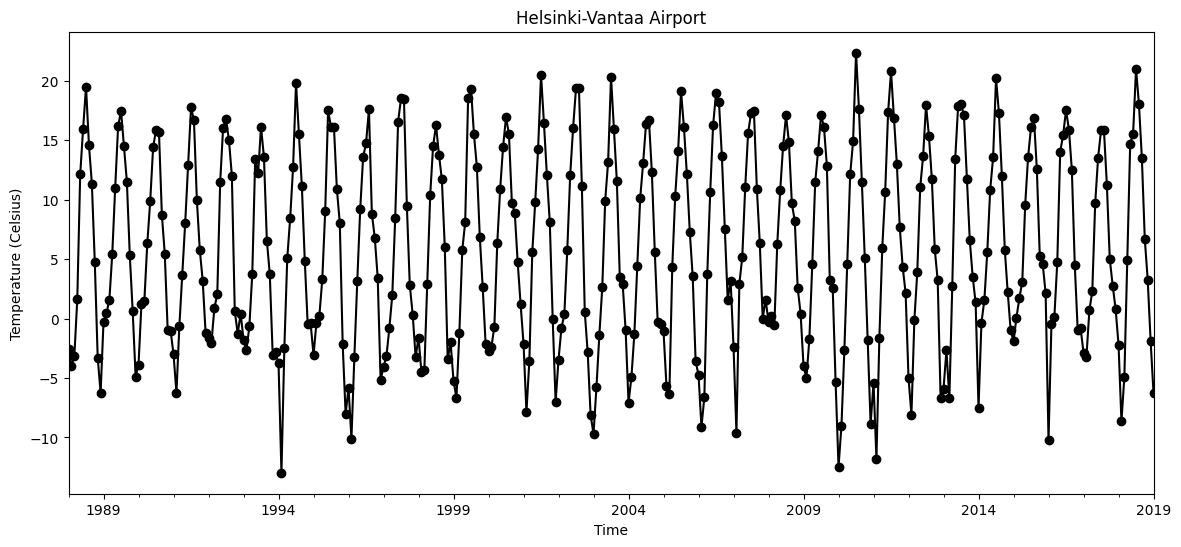

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt

selection_temp = selection.sort_index()['TEMP_C']
fig = selection_temp.plot(
    style='ko-',
    figsize=(14, 6)
)

fig.set_title('Helsinki-Vantaa Airport')
fig.set_xlabel('Time')
fig.set_ylabel('Temperature (Celsius)')

# Set output file name
outputfp = "temp_line_plot.png"

# Save plot as image
fig.figure.savefig(outputfp, dpi=300)

In [ ]:
import os

#Check that output file exists (also open the file and check that the plot looks ok!)
os.path.exists(outputfp)

**REMINDER**: Don't forget to upload your figure and the modified notebook into your personal GitHub repository!

### Done!

### Optional extra task: An interactive plot (0 points)

Create an interactive version of the monthly temperatures using [hvPlot](https://hvplot.holoviz.org/)!

In [10]:
# Import pandas submodule of hvplot in this cell

import hvplot.pandas

In [17]:
# Plot an interactive visualization of the monthly temperatures. 
# Note! You might have to re-order the data before plotting.

selection_temp.hvplot.line(
    # style="ko-",
    ylabel="Temperature (Celsius)",
    xlable="Date",
    title="Helsinki-Vantaa Airport"
)

:Curve   [DATE]   (TEMP_C)